In [23]:
%matplotlib notebook

import os
import numpy as np
from torchani.data._pyanitools import anidataloader
import matplotlib.pyplot as plt
import collections


```
The data is stored in a HDF5 file, each group usually holds information for multiple conformers for a molecule/chemical composition.
Information includes chemical composition, coordinates, GFN2-xTB & wB97x/6-31G* energies, ANI-1x & ANI-1ccx model energies for each conformers (both single model and ensemble averaged), ANI-1x & ANI-1ccx model atomic energies (both single model and ensemble averaged), and atom types assigned based on GAFF2 force field.
Atoms are given atom type "xx" if the compound/complex is unable to assign using Antechamber.
```

In [25]:
at_types = '''
c                Sp2 C carbonyl group 
c1               Sp C
c2               Sp2 C  
c3               Sp3 C
ca               Sp2 C in pure aromatic systems
cp               Head Sp2 C that connect two rings in biphenyl sys. 
cq               Head Sp2 C that connect two rings in biphenyl sys. identical to cp 
cc               Sp2 carbons in non-pure aromatic systems
cd               Sp2 carbons in non-pure aromatic systems, identical to cc
ce               Inner Sp2 carbons in conjugated systems
cf               Inner Sp2 carbons in conjugated systems, identical to ce
cg               Inner Sp carbons in conjugated systems
ch               Inner Sp carbons in conjugated systems, identical to cg
cx               Sp3 carbons in triangle systems
cy               Sp3 carbons in square systems
cu               Sp2 carbons in triangle systems
cv               Sp2 carbons in square systems
cz               Sp2 carbon in guanidine group
h1               H bonded to aliphatic carbon with 1 electrwd. group  
h2               H bonded to aliphatic carbon with 2 electrwd. group 
h3               H bonded to aliphatic carbon with 3 electrwd. group 
h4               H bonded to non-sp3 carbon with 1 electrwd. group 
h5               H bonded to non-sp3 carbon with 2 electrwd. group 
ha               H bonded to aromatic carbon  
hc               H bonded to aliphatic carbon without electrwd. group 
hn               H bonded to nitrogen atoms
ho               Hydroxyl group
hp               H bonded to phosphate 
hs               Hydrogen bonded to sulphur 
hw               Hydrogen in water 
hx               H bonded to C next to positively charged group  
n                Sp2 nitrogen in amide groups
n1               Sp N  
n2               aliphatic Sp2 N with two connected atoms 
n3               Sp3 N with three connected atoms
n4               Sp3 N with four connected atoms 
na               Sp2 N with three connected atoms 
nb               Sp2 N in pure aromatic systems 
nc               Sp2 N in non-pure aromatic systems
nd               Sp2 N in non-pure aromatic systems, identical to nc
ne               Inner Sp2 N in conjugated systems
nf               Inner Sp2 N in conjugated systems, identical to ne
nh               Amine N connected one or more aromatic rings 
no               Nitro N  
ns               amine N, with 1 attached hydrogen atom
nt               amine N, with 2 attached hydrogen atoms
nx               like n4, but only has one hydrogen atom
ny               like n4, but only has two hydrogen atoms
nz               like n4, but only has three three hydrogen atoms
n+               NH4+
nu               like nh, but only has one attached hydrogen atom
nv               like nh, but only has two attached hydrogen atoms
n7               like n3, but only has one attached hydrogen atom 
n8               like n3, but only has two attached hydrogen atoms
n9               NH3
ni               like n in RG3 
nj               like n in RG4
nk               like n4/nx/ny in RG3 
nl               like n4/nx/ny in RG4
nm               like nh in RG3 
nn               like nh in RG4
np               like n3 in RG3 
nq               like n3 in RG4
n5               like n7 in RG3 
n6               like n7 in RG4
o                Oxygen with one connected atom
oh               Oxygen in hydroxyl group
op               
oq               
os               Ether and ester oxygen
ow               Oxygen in water 
'''


In [28]:
dict_ats = collections.defaultdict(list)

count = 0
mol_count = 0
for data in anidataloader('../dataset/gaff_typing_drugbank_wb97x_dz_xtb_ani_aes.h5'):
    formula = data['path'].split('/')[-1]
    species = data['species']
    wb97x_dz_energy = data['wb97x_dz_energy']
    min_wb97x_dz_energy = np.amin(wb97x_dz_energy)
    ani1x_atom_energy = data['ani1x_atom_energy']
    # ani1ccx_atom_energy = data['ani1ccx_atom_energy']
    gaff_types = data['gaff_types']
    # if count > 50:
    #     break
    for i in range(len(wb97x_dz_energy)): # loop through conformers
        if (wb97x_dz_energy[i] - min_wb97x_dz_energy) < 0.02:
            count += 1
            for atype, ani1x_ae in zip(gaff_types[i], ani1x_atom_energy[i]): # loop through atoms
                dict_ats[atype.decode("utf-8")].append(ani1x_ae[8]) # use only the ensemble averaged atomic energy

    mol_count += 1

print(mol_count, count)

837 2280


In [29]:
print('atom type | number of values')
for k, v in sorted(dict_ats.items()):
    print("%s \t %d" % (k, len(v)))

# remove atom types for identical environment used in antechamber
dict_ats['cp'].extend(dict_ats['cq'])
del dict_ats['cq']
dict_ats['cc'].extend(dict_ats['cd'])
del dict_ats['cd']
dict_ats['ce'].extend(dict_ats['cf'])
del dict_ats['cf']
dict_ats['cg'].extend(dict_ats['ch'])
del dict_ats['ch']

dict_ats['n3'].extend(dict_ats['n5'] + dict_ats['n6'] + dict_ats['n7'] + dict_ats['n8'] \
                      + dict_ats['np'] + dict_ats['nq'])
del dict_ats['n5']
del dict_ats['n6']
del dict_ats['n7']
del dict_ats['n8']
del dict_ats['np']
del dict_ats['nq']
dict_ats['n4'].extend(dict_ats['nx'] + dict_ats['ny'] + dict_ats['nz'] + dict_ats['nk'] + dict_ats['nl'])
del dict_ats['nx']
del dict_ats['ny']
del dict_ats['nz']
del dict_ats['nk']
del dict_ats['nl']
dict_ats['nc'].extend(dict_ats['nd'])
del dict_ats['nd']
dict_ats['ne'].extend(dict_ats['nf'])
del dict_ats['nf']
dict_ats['nh'].extend(dict_ats['nu'] + dict_ats['nv'] + dict_ats['nm'] + dict_ats['nn'])
del dict_ats['nu']
del dict_ats['nv']
del dict_ats['nm']
del dict_ats['nn']
dict_ats['ns'].extend(dict_ats['nt'])
del dict_ats['nt']

# generate a simplified atom typing based on description in GAFF2
dict_sats = collections.defaultdict(list)
dict_sats['Csp1'].extend(dict_ats['c1'] + dict_ats['cg'])
dict_sats['Csp2'].extend(dict_ats['c'] + dict_ats['c2'] + dict_ats['cc'] + dict_ats['cu'] + dict_ats['cv'] \
                         + dict_ats['cz'])
dict_sats['Csp3'].extend(dict_ats['c3'] + dict_ats['cx'] + dict_ats['cy'])
dict_sats['Caro'].extend(dict_ats['ca'] + dict_ats['cp'] + dict_ats['ce'])

dict_sats['Nsp1'].extend(dict_ats['n1'])
dict_sats['Nsp2'].extend(dict_ats['n'] + dict_ats['n2'] + dict_ats['na'] + dict_ats['nc'])
dict_sats['Nsp3'].extend(dict_ats['n3'] + dict_ats['n4'] + dict_ats['nh'] + dict_ats['ns'] + dict_ats['n9'])
dict_sats['Naro'].extend(dict_ats['nb'] + dict_ats['ne'])
dict_sats['Nnitro'].extend(dict_ats['no'])
dict_sats['N+'].extend(dict_ats['n+'])

print('-----------------------------')
print('atom type | number of values')
for k, v in sorted(dict_ats.items()):
    print("%s \t %d" % (k, len(v)))

print('-----------------------------')
print('atom type | number of values')
for k, v in sorted(dict_sats.items()):
    print("%s \t %d" % (k, len(v)))


atom type | number of values
c 	 2564
c1 	 130
c2 	 743
c3 	 15051
ca 	 12651
cc 	 933
cd 	 724
ce 	 412
cf 	 166
cg 	 41
ch 	 4
cp 	 178
cx 	 100
cy 	 34
h1 	 10493
h2 	 257
h4 	 498
h5 	 247
ha 	 8820
hc 	 18298
hn 	 3030
ho 	 2510
n 	 373
n1 	 63
n2 	 163
n3 	 405
n5 	 2
n7 	 284
n8 	 353
na 	 523
nb 	 368
nc 	 253
nd 	 434
ne 	 17
nf 	 17
nh 	 130
nj 	 5
no 	 53
nq 	 1
ns 	 600
nt 	 190
nu 	 212
nv 	 249
o 	 2696
oh 	 2510
op 	 12
oq 	 9
os 	 1516
-----------------------------
atom type | number of values
c 	 2564
c1 	 130
c2 	 743
c3 	 15051
ca 	 12651
cc 	 1657
ce 	 578
cg 	 45
cp 	 178
cu 	 0
cv 	 0
cx 	 100
cy 	 34
cz 	 0
h1 	 10493
h2 	 257
h4 	 498
h5 	 247
ha 	 8820
hc 	 18298
hn 	 3030
ho 	 2510
n 	 373
n+ 	 0
n1 	 63
n2 	 163
n3 	 1045
n4 	 0
n9 	 0
na 	 523
nb 	 368
nc 	 687
ne 	 34
nh 	 591
nj 	 5
no 	 53
ns 	 790
o 	 2696
oh 	 2510
op 	 12
oq 	 9
os 	 1516
-----------------------------
atom type | number of values
Caro 	 13407
Csp1 	 175
Csp2 	 4964
Csp3 	 15185
N+ 	 0


<IPython.core.display.Javascript object>


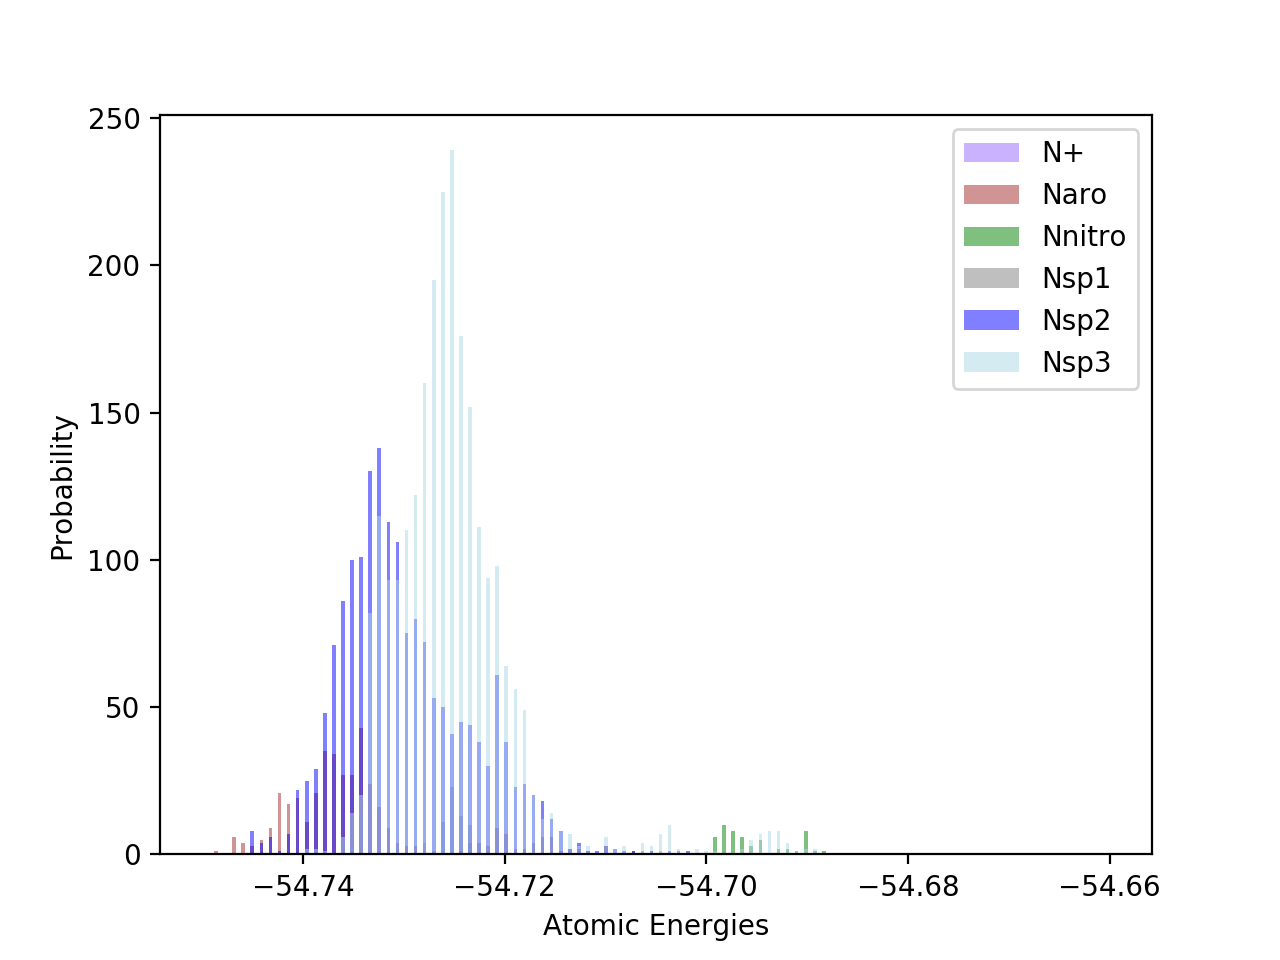

In [32]:
# plt.clf()
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')


colors_dict = {'Nsp1':'#808080', 'Nsp2':'#0000FF', 'Nsp3':'#ADD8E6', 'Naro':'#A52A2A', 'Nnitro':'#008000', \
               'N+':'#9966FF'}
               

for k, v in sorted(dict_sats.items()):
    if k.startswith('N'):
        # print(k, len(v))
        n, bins, patches = plt.hist(v, bins=100, range=(-54.75, -54.66), rwidth=0.4,density=False, \
                                    facecolor=colors_dict[k], alpha=0.5, label=(k))

ax.legend()
plt.show()


<IPython.core.display.Javascript object>


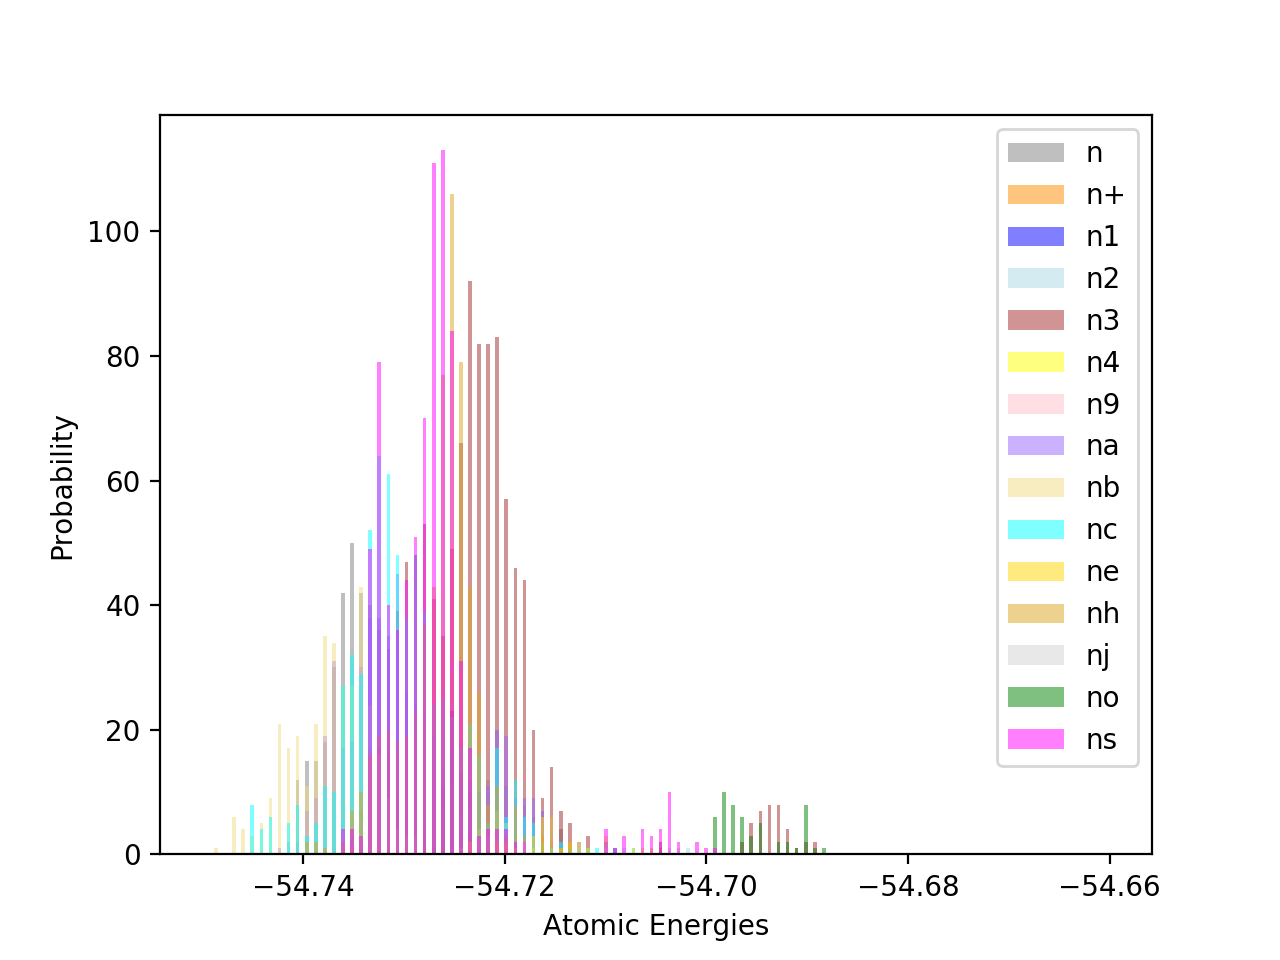

In [33]:
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')


colors_dict = {'n':'#808080', 'n1':'#0000FF', 'n2':'#ADD8E6', 'n3':'#A52A2A', 'n4':'#FFFF00', \
               'na':'#9966FF', 'nb':'#F0DC82', 'nc':'#00FFFF', 'ne':'#FFD700', 'nh':'#DAA520', \
               'nj':'#D3D3D3', 'no':'#008000', 'ns':'#FF00FF', 'n+':'#FF8C00', 'n9':'#FFC0CB'}
               

for k, v in sorted(dict_ats.items()):
    if k.startswith('n'):
        # print(k, len(v))
        n, bins, patches = plt.hist(v, bins=100, range=(-54.75, -54.66), rwidth=0.4, density=False, \
                                    facecolor=colors_dict[k], alpha=0.5, label=(k))

ax.legend()
plt.show()


<IPython.core.display.Javascript object>


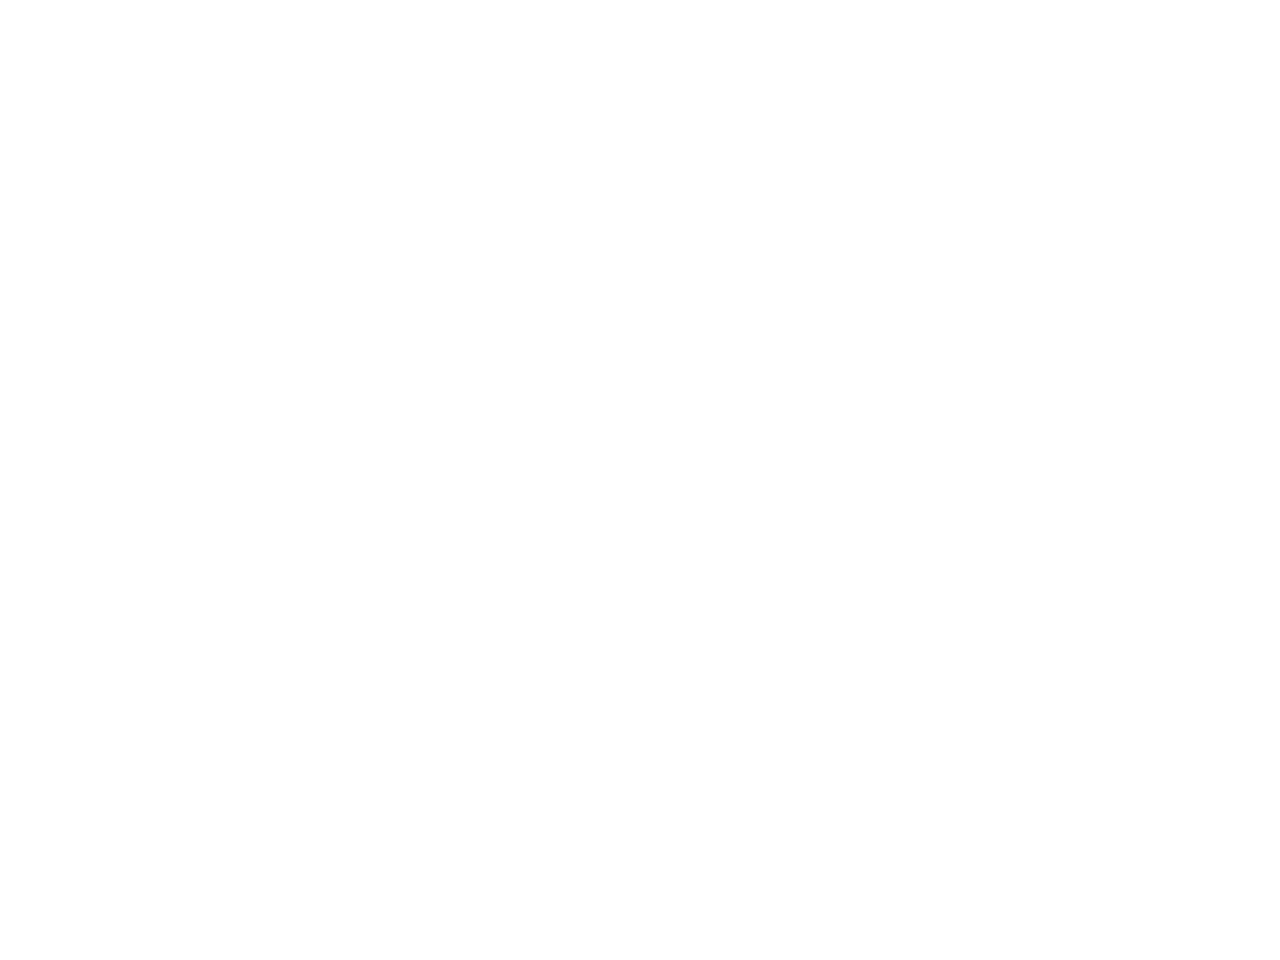

In [34]:
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')

colors_dict = {'c':'#808080', 'c1':'#0000FF', 'c2':'#ADD8E6', 'c3':'#A52A2A', \
               'ca':'#9966FF', 'cc':'#F0DC82', 'ce':'#00FFFF', 'cg':'#FFD700', \
               'cp':'#DAA520', 'cu':'#D3D3D3', 'cv':'#008000', 'cx':'#FF00FF', \
               'cy':'#FF8C00', 'cz':'#FFC0CB'}

for k, v in sorted(dict_ats.items()):
    if k.startswith('c'):
        n, bins, patches = plt.hist(v, bins=100, range=(-38.13, -38.02), rwidth=0.4, density=False, \
                                    facecolor=colors_dict[k], alpha=0.5, label=(k))


ax.legend()
plt.show()


<IPython.core.display.Javascript object>


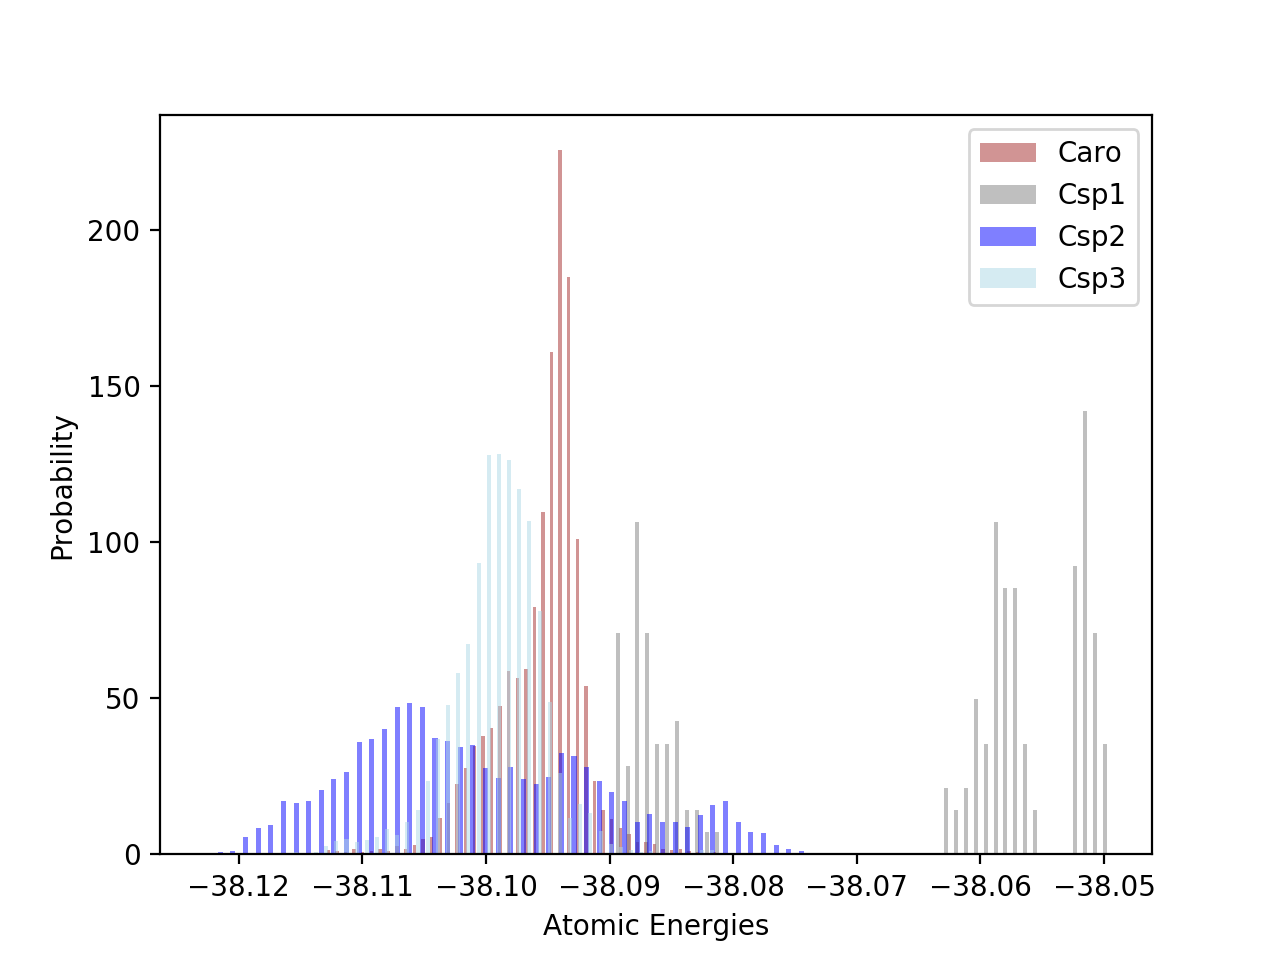

In [37]:
plt.clf()
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')


colors_dict = {'Csp1':'#808080', 'Csp2':'#0000FF', 'Csp3':'#ADD8E6', 'Caro':'#A52A2A'}
               

for k, v in sorted(dict_sats.items()):
    if k.startswith('C'):
        # print(k, len(v))
        # n, bins, patches = plt.hist(v, bins=200, range=(-38.13, -38.02), density=False, \
        n, bins, patches = plt.hist(v, bins=50, density=True, rwidth=0.4, \
                                    facecolor=colors_dict[k], alpha=0.5, label=(k))

ax.legend()
plt.show()


<IPython.core.display.Javascript object>


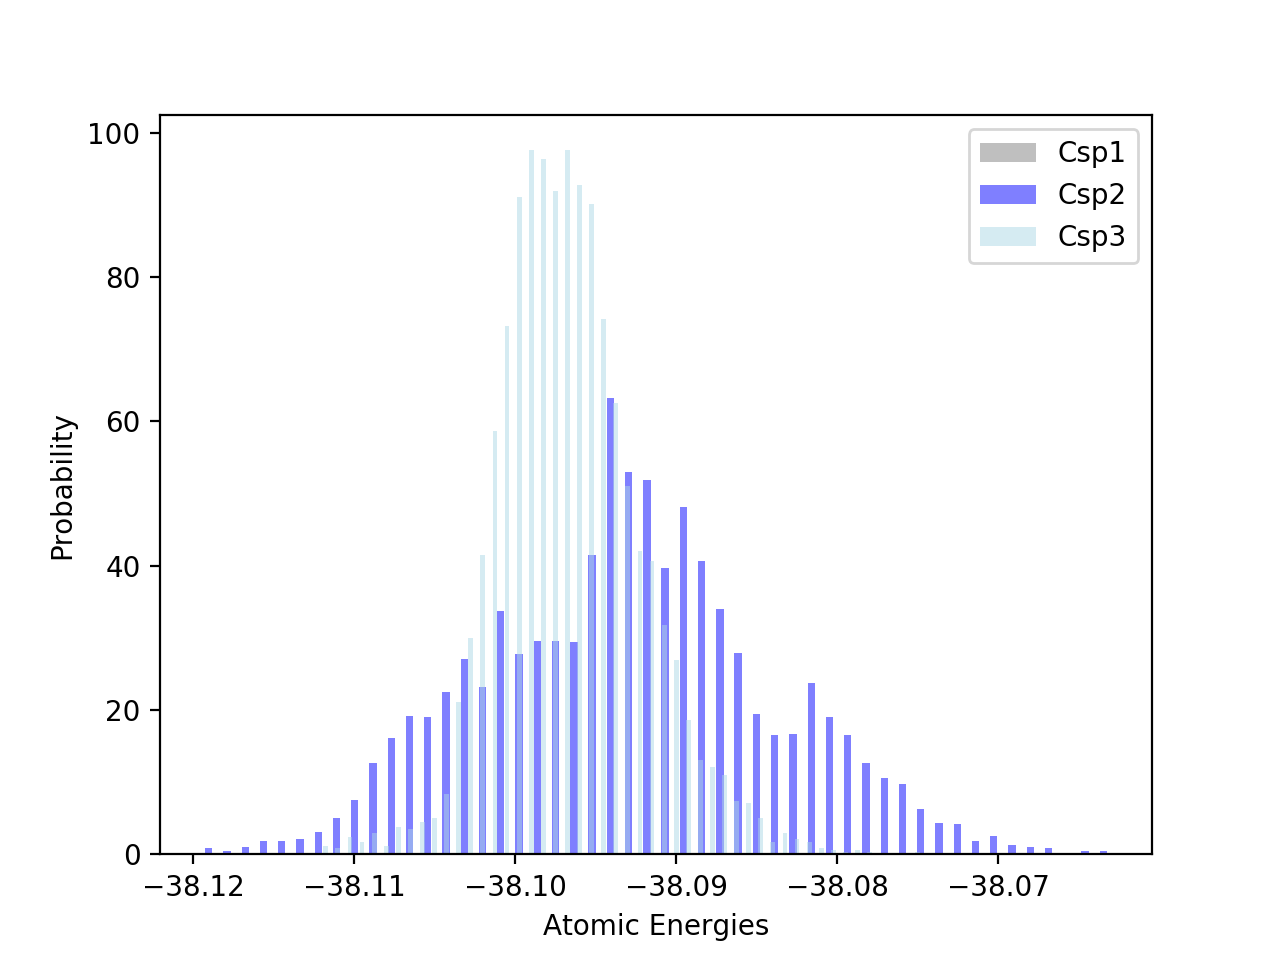

In [22]:
plt.clf()
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')


colors_dict = {'Csp1':'#808080', 'Csp2':'#0000FF', 'Csp3':'#ADD8E6', 'Caro':'#A52A2A'}
               
dict_sats['Csp2'].extend(dict_sats['Caro'])
del dict_sats['Caro']

for k, v in sorted(dict_sats.items()):
    if k.startswith('C'):
        # print(k, len(v))
        # n, bins, patches = plt.hist(v, bins=200, range=(-38.13, -38.02), density=False, \
        n, bins, patches = plt.hist(v, bins=50, density=True, rwidth=0.4, \
                                    facecolor=colors_dict[k], alpha=0.5, label=(k))

ax.legend()
plt.show()

<IPython.core.display.Javascript object>


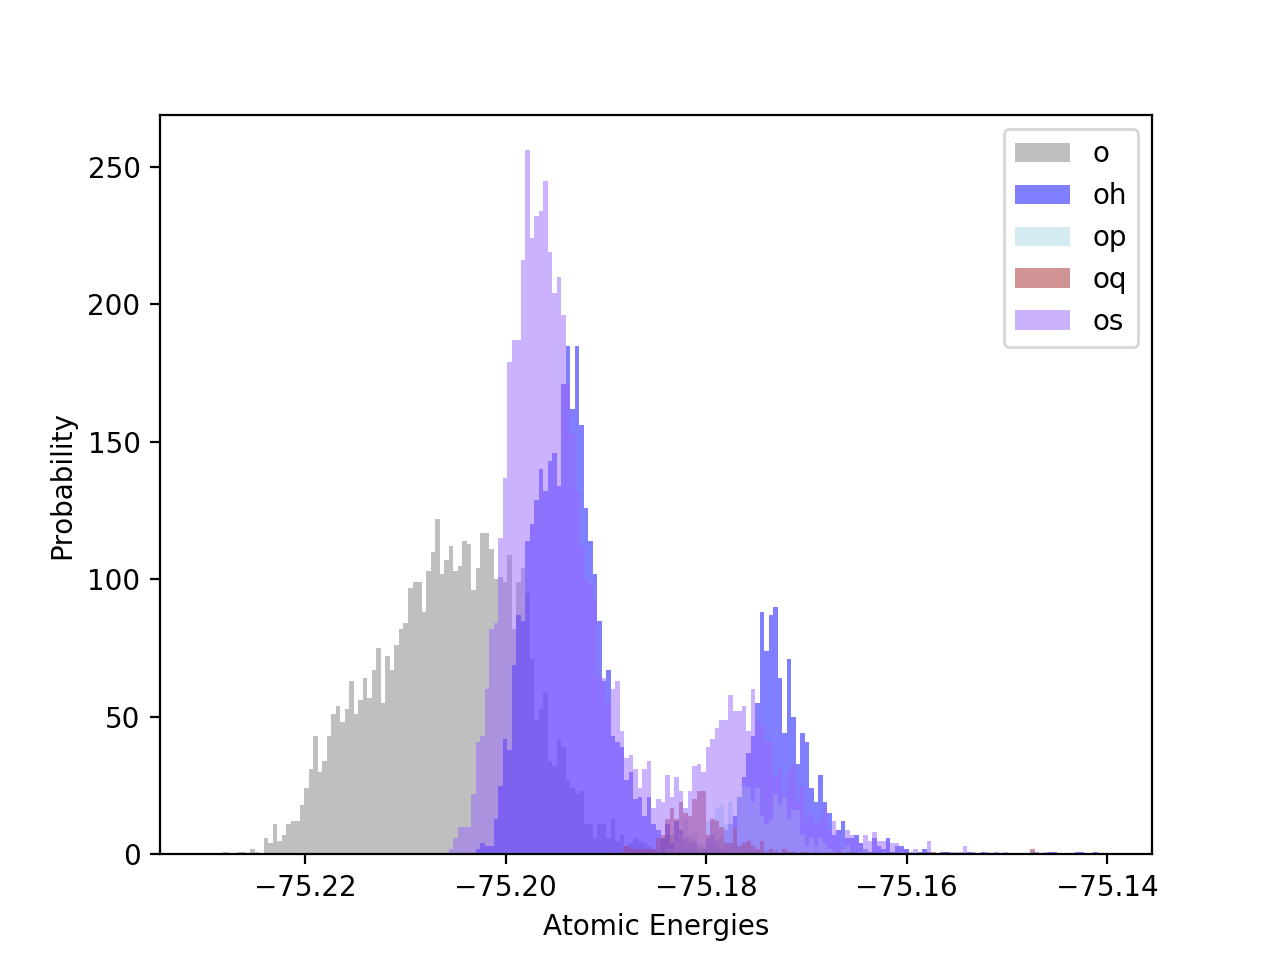

In [71]:
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#808080', '#0000FF', '#ADD8E6', '#A52A2A', '#9966FF', '#F0DC82', '#00FFFF', \
          '#FFD700', '#DAA520', '#D3D3D3', '#008000', '#FF00FF', '#FF8C00', '#FFC0CB', \
          '#FF0000', '#EE82EE']
count = 0
for k, v in sorted(dict_ats.items()):
    if k.startswith('o'):
        n, bins, patches = plt.hist(v, bins=200, range=(-75.23, -75.14), density=False, \
                                    facecolor=colors[count % len(colors)], alpha=0.5, label=(k))
        count += 1

ax.legend()
plt.show()


<IPython.core.display.Javascript object>


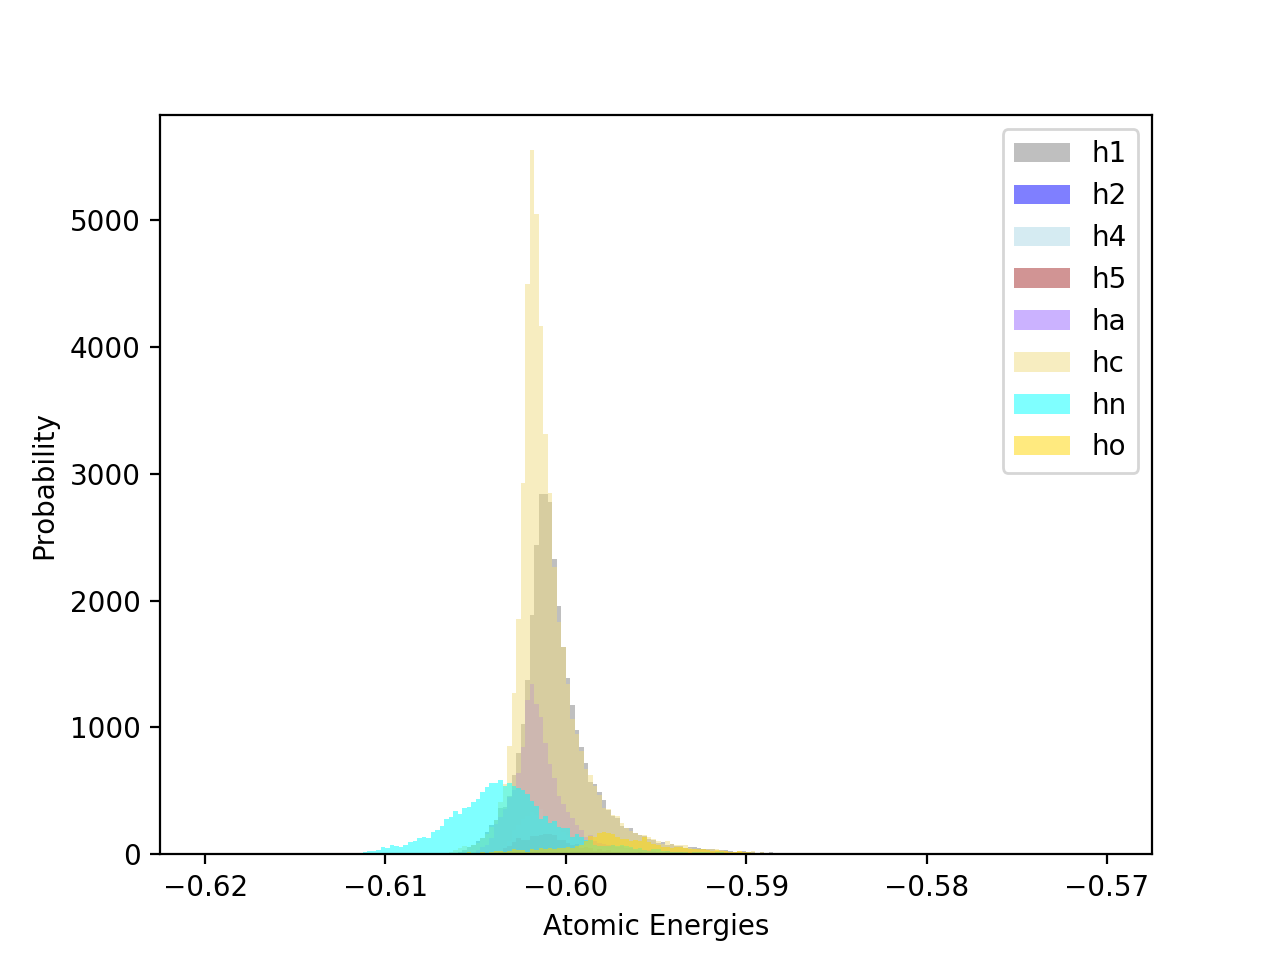

In [72]:
fig = plt.figure()
ax = plt.subplot()
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel('Atomic Energies')
plt.ylabel('Probability')

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#808080', '#0000FF', '#ADD8E6', '#A52A2A', '#9966FF', '#F0DC82', '#00FFFF', \
          '#FFD700', '#DAA520', '#D3D3D3', '#008000', '#FF00FF', '#FF8C00', '#FFC0CB', \
          '#FF0000', '#EE82EE']
count = 0

for k, v in sorted(dict_ats.items()):
    if k.startswith('h'):
        n, bins, patches = plt.hist(v, bins=200, range=(-0.62, -0.57), density=False,\
                                    facecolor=colors[count % len(colors)], alpha=0.5, label=(k))
        count += 1

ax.legend()
plt.show()
